In [3]:
import astropy.io.fits as fits
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np
import warnings

In [4]:
import sys
sys.path.insert(0, '../')

from dynamical_model import DynamicalModel

In [5]:
## default values to test with
r_eff = 1.85
theta_e = 1.63
gamma = 1.95

## test single aperture calculation

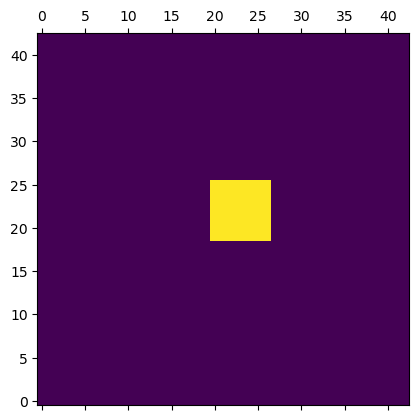

In [19]:
binning = np.zeros((43, 43))

binning[22-3:22+4, 23-3:23+4] = np.ones((7, 7))

plt.matshow(binning, origin='lower')

In [20]:
lens_names = ['WFI2033']
R_sersic_1 = [0.984069231299994]
n_sersic_1 = [ 4.0]
I_sersic_1 = [9.8487305703656,]
q_light_1 = [0.6987904713444464]
phi_light_1 = [33.1] 

R_sersic_2 = [2.6139552330677396,]
n_sersic_2 = [1.0,]
I_light_2 = [3.6440840312158036,]
q_light_2 = [0.6987904713444464]

theta_es = [0.929]
gammas = [1.95]
qs = [0.79]
pas = [33.1]

## elliptical vs spherical

WFI2033
Residuals > 10%: Change `inner_slope` or `outer_slope` or increase `ngauss`
Residuals > 10%: Change `inner_slope` or `outer_slope` or increase `ngauss`
(43, 43)
Residuals > 10%: Change `inner_slope` or `outer_slope` or increase `ngauss`
Residuals > 10%: Change `inner_slope` or `outer_slope` or increase `ngauss`
(43, 43)


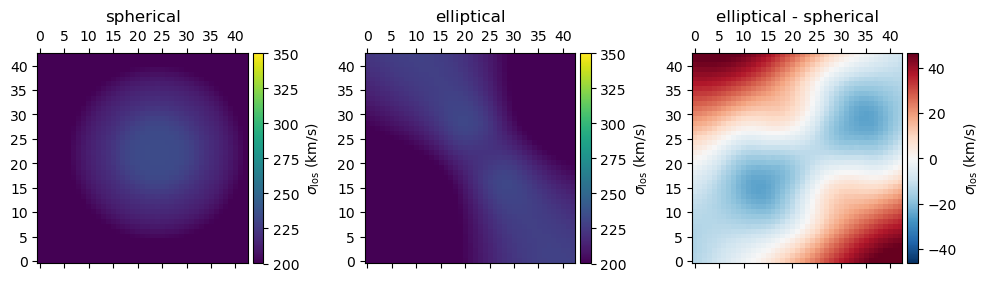

In [16]:
anisotropy_model = 'constant'
ani_param = 1


dyn_model = DynamicalModel(mass_model='powerlaw')

# theta_e = 1.63317001e+00
# gamma = 1.95886843e+00
# q = 7.61476589e-01 
# pa = 1.15742114e+02,
#1.87925701e+03, 9.06948652e+01, 8.71954746e-01, 
ani_param = 1.
    
dyn_model.PSF_FWHM = 0.7 

for i in range(len(lens_names)):
    print(lens_names[i])
    
    dyn_model.R_sersic_1 = lambda : R_sersic_1[i]
    dyn_model.n_sersic_1 = lambda : n_sersic_1[i]
    dyn_model.I_light_1 = lambda : I_sersic_1[i]
    dyn_model.q_light_1 = lambda : q_light_1[i]
    dyn_model.phi_light_1 = lambda : phi_light_1[i]

    dyn_model.R_sersic_2 = lambda : R_sersic_2[i]
    dyn_model.n_sersic_2 = lambda : n_sersic_2[i]
    dyn_model.I_light_2 = lambda : I_light_2[i]
    dyn_model.q_light_2 = lambda : q_light_2[i]
    
    theta_e = theta_es[i]
    gamma = gammas[i]
    q = qs[i]
    pa = pas[i]

    np.random.seed(2)
    a, _ = dyn_model.compute_jampy_v_rms_model([theta_e, gamma, 1], pa=pa,
                                            ani_param=ani_param,
                                            anisotropy_model=anisotropy_model,
                                            supersampling_factor=5,
                                            voronoi_bins=None,
                                            is_spherical=True,
                                            do_convolve=True,
                                            q_light=1
                                           )
    print(a.shape)

    np.random.seed(2)
    b, _ = dyn_model.compute_jampy_v_rms_model([theta_e, gamma, q], 
                                            pa=pa,
                                            ani_param=ani_param,
                                            anisotropy_model=anisotropy_model,
                                            supersampling_factor=5,
                                            voronoi_bins=None,
                                            do_convolve=True,
                                            q_light=None                                
                                           )

    print(b.shape)

    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 6))
    #axes = [axes]

    def plot_mat(arr, i, cmap='viridis', vmax=440, vmin=170):
        divider = make_axes_locatable(axes[i])
        im = axes[i].matshow(arr, origin='lower', cmap=cmap, vmax=vmax, vmin=vmin)
        cax = divider.append_axes('right', size='5%', pad=0.05)
        fig.colorbar(im, cax=cax, orientation='vertical', label=r'$\sigma_{\rm los}$ (km/s)')

    #cbar = axes[0].matshow(a[0], origin='lower')
    #cbar = axes[1].matshow(b[0], origin='lower')
    #plt.colorbar(cbar)

    #cbar = axes[2].matshow(a[0] - b[0], origin='lower', cmap='RdBu')
    #plt.colorbar(cbar)
    plot_mat(a.reshape((43, 43)), 0, cmap='viridis', vmax=350, vmin=200)
    plot_mat(b.reshape((43, 43)), 1, cmap='viridis', vmax=350, vmin=200)
    plot_mat(b.reshape((43, 43)) - a.reshape((43, 43)), 2, cmap='RdBu_r', 
             vmax=np.max(b)*0.2, vmin=-np.max(b)*0.2)

    axes[0].set_title('spherical')
    axes[1].set_title('elliptical')
    axes[2].set_title('elliptical - spherical')

    fig.tight_layout()

In [21]:
anisotropy_model = 'constant'
ani_param = 1


dyn_model = DynamicalModel(mass_model='powerlaw')

# theta_e = 1.63317001e+00
# gamma = 1.95886843e+00
# q = 7.61476589e-01 
# pa = 1.15742114e+02,
#1.87925701e+03, 9.06948652e+01, 8.71954746e-01, 
ani_param = 1.
    
dyn_model.PSF_FWHM = 0.7 

for i in range(len(lens_names)):
    print(lens_names[i])
    
    dyn_model.R_sersic_1 = lambda : R_sersic_1[i]
    dyn_model.n_sersic_1 = lambda : n_sersic_1[i]
    dyn_model.I_light_1 = lambda : I_sersic_1[i]
    dyn_model.q_light_1 = lambda : q_light_1[i]
    dyn_model.phi_light_1 = lambda : phi_light_1[i]

    dyn_model.R_sersic_2 = lambda : R_sersic_2[i]
    dyn_model.n_sersic_2 = lambda : n_sersic_2[i]
    dyn_model.I_light_2 = lambda : I_light_2[i]
    dyn_model.q_light_2 = lambda : q_light_2[i]
    
    theta_e = theta_es[i]
    gamma = gammas[i]
    q = qs[i]
    pa = pas[i]

    np.random.seed(2)
    a, _ = dyn_model.compute_jampy_v_rms_model([theta_e, gamma, 1], pa=pa,
                                            ani_param=ani_param,
                                            anisotropy_model=anisotropy_model,
                                            supersampling_factor=5,
                                            voronoi_bins=binning-1,
                                            is_spherical=True,
                                            do_convolve=True,
                                            q_light=1
                                           )
    print(a)

    np.random.seed(2)
    b, _ = dyn_model.compute_jampy_v_rms_model([theta_e, gamma, q], 
                                            pa=pa,
                                            ani_param=ani_param,
                                            anisotropy_model=anisotropy_model,
                                            supersampling_factor=5,
                                            voronoi_bins=binning-1,
                                            do_convolve=True,
                                            q_light=None                                
                                           )

    print(b)

WFI2033
Residuals > 10%: Change `inner_slope` or `outer_slope` or increase `ngauss`
Residuals > 10%: Change `inner_slope` or `outer_slope` or increase `ngauss`
[233.90423372]
Residuals > 10%: Change `inner_slope` or `outer_slope` or increase `ngauss`
Residuals > 10%: Change `inner_slope` or `outer_slope` or increase `ngauss`
[222.58213011]
